# Peaks mit Python finden
siehe [https://plot.ly/python/peak-finding/](https://plot.ly/python/peak-finding/)

In [61]:
import numpy as np
import pylab as plt

In [62]:
%matplotlib inline

In [139]:
x = np.linspace(1, 10, 1000) 
yp = np.sin(x) + np.sin((x-0.5)/2) - np.cos((x-1.0)*6) + 2
noise = np.random.normal(0, 0.1, 1000)
y = yp #+ noise

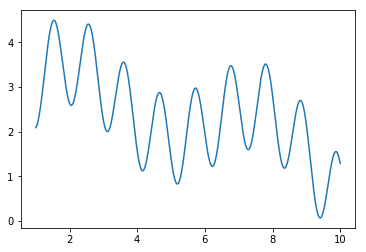

In [140]:
plt.plot(x, y)

## Variante 1: SciPy

In [141]:
from scipy.signal import find_peaks_cwt
widths = np.linspace(1, 10, 10)
widths

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [142]:
peaks = find_peaks_cwt(y, widths)
peaks

array([  4,  59, 175, 291, 407, 524, 640, 756, 872, 990, 994])

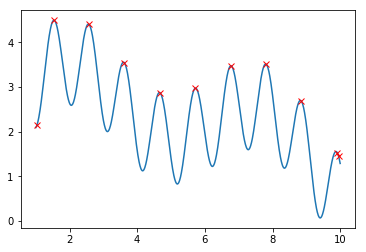

In [143]:
plt.figure()
plt.plot(x, y)
plt.plot(x[peaks], y[peaks], 'rx')

## Variante 2: peakutils

In [144]:
import peakutils
peaks = peakutils.indexes(y, thres=0.5, min_dist=40) 
# threshold: relative Höhe 0..1 ab der Peaks gelten
# min_dist: Anzahl Punkte zwischen 2 Peaks
peaks

array([ 60, 173, 288, 406, 524, 640, 754, 868])

### Minima

In [145]:
minima = peakutils.indexes(-y, thres=0.5, min_dist=40) 

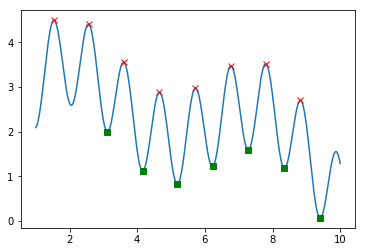

In [146]:
plt.figure()
plt.plot(x, y)
plt.plot(x[peaks], y[peaks], 'rx')
plt.plot(x[minima], y[minima], 'gs')

## Integral - Area Under Curve
siehe [https://stackoverflow.com/questions/13320262/calculating-the-area-under-a-curve-given-a-set-of-coordinates-without-knowing-t](https://stackoverflow.com/questions/13320262/calculating-the-area-under-a-curve-given-a-set-of-coordinates-without-knowing-t)

In [147]:
from scipy.integrate import simps
from numpy import trapz

peak1 = y[minima[2]:minima[3]]

# Compute the area using the composite trapezoidal rule.
area = trapz(peak1, dx=0.01)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(peak1, dx=0.01)
print("area =", area)

area = 2.28417522211
area = 2.28417759778
